In [1378]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as dframe

In [1379]:
np.seterr(divide='ignore', invalid='ignore')
#浮動小数点の計算での決め事
#ignoreにすることでエラーを無視する
#divideは0で除算した時どうするか、invalidは浮動小数点演算が無効な場合の処理

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [1380]:
# np.set_printoptions(precision=30, suppress=True)
#配列の表示設定

In [1381]:
data = np.load('A01T.npz')
#numpy独自のバイナリファイルで保存する

In [1382]:
data.files
#npzファイルに保存されているnp配列の名称を確認

['s', 'etyp', 'epos', 'edur', 'artifacts']

In [1383]:
prop = np.c_[data['etyp'], data['epos'], data['edur']]
#配列の結合
#np.c_[]==np.r_['-1, 2, 0']
#2次元以上の配列で、最も最低の次元(axisの番号が一番大きい)方向で結合する
#3次元の配列で結合する際は、第3次元で結合

In [1384]:
prop.shape
#要素数を表示

(603, 3)

In [1385]:
pd.options.display.max_rows = None
#表示設定の配列次元の制限を無しにする

In [1386]:
pd.set_option('display.max_rows', None)
#上のコードとしていることはほどんど同じ

In [1387]:
dframe(prop, columns=['etype', 'epos','edur']);
#DataFrameに結合配列を格納
#propというデータの3つの列を結合させてDataFrameに格納

In [1388]:
sample_data = dframe(data['s'])

In [1389]:
sample_data = sample_data.iloc[:, 0:22]
#行すべてと22列を切りだしている
#EOGのデータを抜いて、脳波だけを取り出している

In [1390]:
sample_data.shape

(672528, 22)

In [1391]:
sample_data.head();

In [1392]:
idx_left = np.argwhere(prop[:, 0]==769)
idx_right = np.argwhere(prop[:, 0]==770)
#イベントタイプが左、右のデータを取得する
#argwhereは配列から条件にあうデータを取得する

In [1393]:
idx_left = idx_left.flatten()
idx_right = idx_right.flatten()
#多次元配列を1次元に変換

In [1394]:
left_pos = prop[idx_left, 1]
right_pos = prop[idx_right, 1]
#対応するイベントタイプのポジションを取得

In [1395]:
left_dur = prop[idx_left, 2]
right_dur = prop[idx_right, 2]
#各イベントの継続時間を取得

In [1396]:
dur = 313

In [1397]:
E_left = np.zeros([left_pos.shape[0], dur, sample_data.shape[1]])
E_right = np.zeros([right_pos.shape[0], dur, sample_data.shape[1]])
#各イベントのサンプルを取得するための配列形成

In [1398]:
for i in range(E_left.shape[0]):
    E_left[i]=sample_data.iloc[left_pos[i]:left_pos[i]+dur, :]
for i in range(E_right.shape[0]):
    E_right[i]=sample_data.iloc[right_pos[i]:right_pos[i]+dur, :]
#対応しているデータを切りだす
#左手や右手の開始時刻から継続時間までのデータを取得する
#1回の実験で22チャンネルのデータが入っている

In [1399]:
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))
#行列の名前を作成

In [1400]:
dframe(E_left[0], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,1.220703,3.808594,1.757812,3.759766,1.367188,2.099609,0.244141,4.687500,5.615234,5.615234,...,-8.935547,4.101562,2.294922,3.173828,-0.683594,-4.785156,3.125000,0.488281,-1.171875,2.099609
1,5.468750,4.052734,6.152344,1.904297,5.810547,1.464844,5.468750,5.029297,9.228516,3.759766,...,-3.125000,3.906250,6.787109,1.855469,0.830078,-2.294922,4.150391,1.220703,-0.146484,2.294922
2,4.345703,5.029297,5.566406,0.781250,3.564453,0.195312,5.468750,4.589844,8.251953,2.441406,...,-0.732422,2.343750,4.931641,2.148438,2.294922,-0.488281,2.832031,1.953125,1.562500,2.148438
3,2.294922,7.470703,2.685547,0.976562,-0.683594,1.025391,7.275391,6.152344,3.125000,0.537109,...,-1.953125,3.955078,0.683594,2.636719,0.683594,-0.048828,1.806641,1.367188,1.513672,1.806641
4,0.146484,1.757812,0.000000,-5.322266,-3.027344,-4.101562,6.982422,-1.660156,-0.781250,-6.396484,...,-4.394531,-2.539062,-2.197266,-2.441406,-3.515625,-3.662109,-2.441406,-2.246094,-1.025391,-0.830078
5,5.468750,5.126953,4.101562,2.636719,3.710938,5.078125,9.375000,2.441406,3.515625,1.269531,...,4.541016,3.173828,3.125000,5.615234,6.103516,5.175781,4.882812,6.933594,8.007812,8.886719
6,6.591797,1.611328,3.906250,2.441406,5.078125,3.417969,6.250000,-1.806641,3.466797,1.953125,...,2.685547,-1.123047,3.955078,4.736328,4.345703,1.855469,3.076172,6.250000,6.689453,7.080078
7,6.298828,4.638672,5.371094,7.568359,6.689453,6.884766,3.369141,0.732422,5.371094,6.982422,...,1.416016,-0.048828,4.980469,8.789062,7.666016,3.710938,5.712891,9.179688,9.619141,10.009766
8,13.574219,8.251953,13.769531,13.232422,16.601562,14.550781,8.496094,5.859375,15.722656,14.453125,...,16.357422,7.080078,15.625000,17.480469,18.603516,15.380859,14.257812,18.017578,18.603516,18.652344
9,16.699219,14.843750,18.994141,20.605469,20.166016,20.068359,11.230469,15.039062,21.191406,22.167969,...,11.474609,16.748047,20.263672,24.267578,22.167969,18.261719,17.578125,18.896484,17.578125,15.966797


In [1401]:
E_left = np.transpose(E_left, (0, 2, 1))
E_right = np.transpose(E_right, (0, 2, 1))
#行と列を変換
dframe(E_left[0])

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
0,1.220703,5.468750,4.345703,2.294922,0.146484,5.468750,6.591797,6.298828,13.574219,16.699219,...,12.255859,12.988281,13.427734,11.474609,10.888672,12.695312,10.742188,12.255859,15.820312,10.595703
1,3.808594,4.052734,5.029297,7.470703,1.757812,5.126953,1.611328,4.638672,8.251953,14.843750,...,8.203125,8.203125,8.642578,10.253906,13.427734,11.962891,13.964844,13.183594,17.089844,11.816406
2,1.757812,6.152344,5.566406,2.685547,0.000000,4.101562,3.906250,5.371094,13.769531,18.994141,...,8.496094,9.912109,10.888672,9.912109,11.035156,13.574219,12.451172,12.988281,15.917969,10.986328
3,3.759766,1.904297,0.781250,0.976562,-5.322266,2.636719,2.441406,7.568359,13.232422,20.605469,...,11.035156,11.035156,8.398438,10.253906,11.083984,9.375000,11.328125,11.376953,16.406250,9.179688
4,1.367188,5.810547,3.564453,-0.683594,-3.027344,3.710938,5.078125,6.689453,16.601562,20.166016,...,10.205078,10.498047,9.863281,10.156250,9.716797,11.181641,10.595703,12.548828,15.673828,9.033203
5,2.099609,1.464844,0.195312,1.025391,-4.101562,5.078125,3.417969,6.884766,14.550781,20.068359,...,12.207031,8.935547,6.152344,8.740234,8.056641,6.982422,8.935547,10.253906,15.820312,6.054688
6,0.244141,5.468750,5.468750,7.275391,6.982422,9.375000,6.250000,3.369141,8.496094,11.230469,...,0.537109,3.271484,6.542969,8.056641,10.644531,13.671875,12.402344,10.742188,10.302734,5.029297
7,4.687500,5.029297,4.589844,6.152344,-1.660156,2.441406,-1.806641,0.732422,5.859375,15.039062,...,1.464844,3.417969,5.029297,9.863281,13.183594,12.500000,15.673828,13.330078,15.673828,8.740234
8,5.615234,9.228516,8.251953,3.125000,-0.781250,3.515625,3.466797,5.371094,15.722656,21.191406,...,4.052734,7.617188,9.130859,11.230469,12.255859,13.769531,14.550781,13.134766,14.404297,9.179688
9,5.615234,3.759766,2.441406,0.537109,-6.396484,1.269531,1.953125,6.982422,14.453125,22.167969,...,7.617188,7.226562,5.859375,9.863281,11.572266,10.400391,14.208984,12.841797,16.601562,8.984375


In [1402]:
print('Transform left_data and right_data dimension to 72 x 22 x 313, that is trial x n_el x samples\n')
print('left_data now has dimension of: ', E_left.shape)
print('right_data now has dimension of: ', E_right.shape)

Transform left_data and right_data dimension to 72 x 22 x 313, that is trial x n_el x samples

left_data now has dimension of:  (72, 22, 313)
right_data now has dimension of:  (72, 22, 313)


In [1403]:
ntrain = 54
E_left_tr = E_left[:ntrain, :, :]
E_right_tr = E_right[:ntrain, :, :]
print('Take 54 data of each left and right data as training data\n')
print('left_tr has dimension of: ', E_left_tr.shape)
print('right_tr has dimension of: ', E_right_tr.shape)
#左右各54個ずつのデータを訓練に使用

Take 54 data of each left and right data as training data

left_tr has dimension of:  (54, 22, 313)
right_tr has dimension of:  (54, 22, 313)


In [1404]:
ntest = 18
E_left_te = E_left[ntrain:ntrain+ntest, :, :]
E_right_te = E_right[ntrain:ntrain+ntest, :, :]
print('Take 18 data of each left and right data as train data\n')
print('left_te has dimension of: ', E_left_te.shape)
print('right_te has dimension of: ', E_right_te.shape)
#左右各18個ずつのデータをテストに使用

Take 18 data of each left and right data as train data

left_te has dimension of:  (18, 22, 313)
right_te has dimension of:  (18, 22, 313)


In [1405]:
nel = 22
#要素数の定義

In [1406]:
#変更可能(変更済み)
#各試行の空間共分散を計算
print('Compute covariance of E_left_tr and E_right_tr...\n')
Cov_left_tr = np.zeros((ntrain, nel, nel))
Cov_right_tr = np.zeros((ntrain, nel, nel))
Cov_left_sum = np.zeros((ntrain,nel))
Cov_right_sum = np.zeros((ntrain,nel))
Cov_left_average = np.zeros((ntrain,nel))
Cov_right_average = np.zeros((ntrain,nel))

#その試行での各電極の平均値を求める
for i in range(ntrain):
    for j in range(dur):
        Cov_left_sum[i,:] = Cov_left_sum[i,:] + E_left_tr[i, :, j]       
for i in range(ntrain):        
    Cov_left_average[i,:] = Cov_left_sum[i,:]/313
#各平均値を引く
for i in range(ntrain):
    for j in range(dur):
        E_left_tr[i, :, j] = E_left_tr[i, :, j] - Cov_left_average[i,:]

for i in range(ntrain):
    Cov_left_tr[i, :, :] = ((E_left_tr[i, :, :]@E_left_tr[i, :, :].T)/313)

#その試行での各電極の平均値を求める
for i in range(ntrain):
    for j in range(dur):
        Cov_right_sum[i] = Cov_right_sum[i] + E_right_tr[i, :, j]
Cov_right_average = Cov_right_sum/313

#各平均値を引く
for i in range(ntrain):
    for j in range(dur):
        E_right_tr[i, :, j] = E_right_tr[i, :, j] - Cov_right_average[i]
    
for i in range(ntrain):
    Cov_right_tr[i, :, :] = ((E_right_tr[i, :, :]@E_right_tr[i, :, :].T)/313)

#.Tは転置を表す、@は行列の積算の演算子、np.traceは対角和
print('Cov_left_tr has dimension of: ', Cov_left_tr.shape)
print('Cov_right_tr has dimension of: ', Cov_right_tr.shape)

Compute covariance of E_left_tr and E_right_tr...

Cov_left_tr has dimension of:  (54, 22, 22)
Cov_right_tr has dimension of:  (54, 22, 22)


In [1407]:
print('Compute avg covariance of left and right class for training...\n')
avgCov_l_tr = np.sum(Cov_left_tr, axis=0)/Cov_left_tr.shape[0]
avgCov_r_tr = np.sum(Cov_right_tr, axis=0)/Cov_right_tr.shape[0]
#np.sum(axis=0)で行方向に足し合わせる
#各試行の値を足し合わせ全試行数で割ることで平均値を求めている
print('Cov_left_tr has dimension of: ', avgCov_l_tr.shape)
print('Cov_right_tr has dimension of: ', avgCov_r_tr.shape)

Compute avg covariance of left and right class for training...

Cov_left_tr has dimension of:  (22, 22)
Cov_right_tr has dimension of:  (22, 22)


In [1408]:
#空間共分散の合成
print('Calculating composite covariance...\n')
avgCov_c_tr = avgCov_l_tr + avgCov_r_tr
print('Size of avgCov_c_tr = ', avgCov_c_tr.shape)

Calculating composite covariance...

Size of avgCov_c_tr =  (22, 22)


In [1409]:
dframe(avgCov_c_tr)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,238.772229,208.415407,231.519799,240.251831,232.500994,214.848158,141.153720,174.957759,202.067659,221.316945,...,147.258515,151.917068,174.100983,179.510233,178.446393,169.880131,140.145278,150.297758,141.636233,121.073469
1,208.415407,213.792396,220.910649,223.442770,207.132605,192.800246,151.871330,187.956144,201.389515,216.024788,...,130.489822,166.293837,177.447967,181.763428,173.146227,161.138518,148.864211,153.776241,141.565560,125.650249
2,231.519799,220.910649,243.800408,245.978511,233.731665,210.527668,155.693531,193.900685,221.028704,237.614555,...,145.880536,171.609832,194.164953,197.405690,191.520844,177.812147,158.450114,166.710248,154.648231,134.598454
3,240.251831,223.442770,245.978511,263.903730,246.634556,229.195847,149.210977,195.556909,222.688683,251.434116,...,154.150183,173.411868,194.924465,207.574158,201.456587,188.039414,159.739841,171.232595,160.849666,137.094214
4,232.500994,207.132605,233.731665,246.634556,245.061483,228.337147,144.462295,183.173346,214.591499,238.494352,...,163.218391,164.018058,191.053579,199.917554,200.128915,189.920190,156.475204,169.754754,161.470836,136.761107
5,214.848158,192.800246,210.527668,229.195847,228.337147,228.586479,132.094778,170.236391,192.202040,221.357053,...,165.468249,154.387276,172.732216,187.792263,190.389869,188.171183,146.498780,160.222874,155.416931,131.647003
6,141.153720,151.871330,155.693531,149.210977,144.462295,132.094778,138.941952,148.300885,152.500385,153.623723,...,102.187719,141.555672,145.055205,139.469318,133.723506,126.743999,130.339315,129.055962,117.519221,111.256886
7,174.957759,187.956144,193.900685,195.556909,183.173346,170.236391,148.300885,182.930114,191.493275,200.705845,...,122.253494,171.084365,178.796133,180.496553,169.016621,153.589304,157.013885,158.869201,144.901185,131.951467
8,202.067659,201.389515,221.028704,222.688683,214.591499,192.202040,152.500385,191.493275,217.785496,228.127097,...,140.711597,176.765979,199.809802,201.651905,191.968182,171.546259,167.910108,175.040922,160.806665,141.728404
9,221.316945,216.024788,237.614555,251.434116,238.494352,221.357053,153.623723,200.705845,228.127097,260.255600,...,156.808425,186.817548,210.114230,225.313724,216.514101,203.270789,179.429929,192.529271,180.019294,158.790096


In [1410]:
λ, V = np.linalg.eig(avgCov_c_tr)
#linalg.eigは初めに固有値を含んだ配列を返し、次に固有値ベクトルを返す
#U=Vである
#Vは直行行列でないのでシュミレット直行化法の使用を検討
#もしくは長さ1に規格化

In [1411]:
#変更可能
λ_dsc = np.sort(λ)[::-1]
idx_dsc = np.argsort(λ)[::-1]
V_dsc = V[:, idx_dsc]
#[::-1]で逆順になるので降順に並べ替えられる
#argsortは降順になるようなインデントの配列を返す
#λの固有値に対応するように固有値ベクトルVを並び替える

In [1412]:
#今回の変更点
#固有値ベクトルを正規直行化
U,r = np.linalg.qr(V_dsc)
dframe(U)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.221822,-0.330072,0.027736,-0.038565,0.442041,0.231916,0.002320,0.127607,0.432421,0.233192,...,0.347433,0.199222,-0.137960,-0.011548,-0.103206,-0.109405,0.042208,-0.010403,0.013025,-0.053263
1,-0.215463,-0.208445,-0.243796,0.149055,0.204768,-0.319752,-0.132403,-0.409804,-0.089975,0.279202,...,-0.244085,0.096452,-0.072898,-0.384780,0.120152,0.206402,0.204387,-0.014615,-0.039916,0.078047
2,-0.234625,-0.248803,-0.150350,-0.076369,0.167539,0.122437,-0.324403,-0.119381,0.069584,-0.139982,...,-0.211616,-0.132010,0.514668,0.244662,-0.150523,-0.242902,-0.330267,-0.006579,-0.091893,-0.063613
3,-0.243480,-0.278592,-0.007412,-0.252621,0.103697,-0.200959,0.078142,-0.077961,0.092505,-0.301173,...,-0.255877,0.011833,-0.087248,0.201377,0.123715,0.191203,0.208813,-0.126910,-0.087655,-0.054135
4,-0.237178,-0.234793,0.136338,-0.104397,0.060677,0.248480,0.138394,0.283495,-0.166804,-0.014999,...,-0.038576,-0.049337,-0.040480,-0.241840,0.307861,0.213694,-0.346317,0.255810,0.162578,0.454124
5,-0.223235,-0.194767,0.283823,0.106613,0.081199,-0.170589,0.559773,0.124019,-0.198704,0.173150,...,-0.024956,-0.454683,0.057823,0.174112,-0.183653,-0.030193,0.145984,-0.076560,-0.077169,-0.153197
6,-0.163056,0.011050,-0.306107,0.536210,0.076364,0.057026,-0.202786,0.406955,-0.393965,0.018717,...,-0.126352,-0.056639,0.056240,0.051719,-0.010292,-0.096667,0.086980,-0.029106,0.003348,0.048257
7,-0.203088,-0.027850,-0.308493,0.216529,-0.122065,-0.191235,0.114254,-0.189378,-0.056374,0.091978,...,0.330956,0.055922,-0.364828,0.286633,0.052816,0.021648,-0.481074,0.200515,-0.065790,-0.228211
8,-0.226765,-0.081767,-0.211464,-0.066744,-0.219536,0.301531,-0.106410,-0.157110,-0.088300,-0.036627,...,0.215112,-0.119415,-0.129253,0.234902,-0.059332,-0.068685,0.483633,0.001125,0.507802,0.125885
9,-0.249938,-0.087626,-0.026557,-0.306539,-0.220229,-0.251804,-0.113344,0.007629,-0.162465,-0.387109,...,0.142152,-0.178513,-0.235121,-0.365318,-0.211535,-0.294791,-0.147130,-0.078739,0.005668,0.037925


In [1413]:
A = U@avgCov_c_tr@U.T
dframe(A)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,495.230368,-273.023651,-423.073183,-376.392658,92.728267,-21.761319,130.819657,-333.226439,-62.842752,-795.020853,...,144.894438,55.344498,-150.610887,464.737795,-104.175757,174.372619,-38.512592,14.709078,-196.653531,217.514361
1,-273.023651,184.170718,248.151259,223.788623,-30.687692,1.128735,-69.895624,197.844727,72.114301,461.413915,...,-83.706696,-41.241348,85.149403,-236.927051,59.946887,-95.637089,1.081027,-13.181877,95.822706,-120.392530
2,-423.073183,248.151259,408.837394,337.474799,-100.916304,18.534613,-110.262300,315.332225,48.518863,728.988041,...,-121.775395,-66.972534,142.343294,-424.669125,80.803531,-157.088235,17.221163,-2.228650,185.738787,-204.003162
3,-376.392658,223.788623,337.474799,316.215983,-60.488064,15.329875,-103.387712,258.175722,72.081049,620.327214,...,-127.086165,-31.381153,111.132008,-327.879769,81.064599,-134.458883,29.689117,-22.720260,144.101323,-171.422292
4,92.728267,-30.687692,-100.916304,-60.488064,66.667321,-18.088521,23.240012,-75.324020,46.381741,-161.756264,...,12.843708,23.602232,-38.889519,141.408156,-9.820677,38.458937,-9.965274,-18.333758,-67.652114,57.634124
5,-21.761319,1.128735,18.534613,15.329875,-18.088521,12.770410,-7.951211,16.924760,-19.917649,33.822712,...,-5.388235,2.299969,9.885756,-32.549418,3.307471,-10.561894,8.662791,6.527978,17.067119,-13.712244
6,130.819657,-69.895624,-110.262300,-103.387712,23.240012,-7.951211,44.392326,-91.499388,-17.538450,-221.825959,...,40.519694,7.777374,-41.559620,124.241445,-24.658339,50.029073,-3.665168,5.811103,-51.054212,53.417542
7,-333.226439,197.844727,315.332225,258.175722,-75.324020,16.924760,-91.499388,263.464517,41.672928,587.089416,...,-92.900108,-53.572694,120.765291,-338.619084,61.338130,-124.941016,-0.743809,5.833886,138.915944,-152.817796
8,-62.842752,72.114301,48.518863,72.081049,46.381741,-19.917649,-17.538450,41.672928,99.536970,110.118855,...,-43.532767,5.130069,11.697372,10.927415,22.551855,-16.892218,-6.978593,-32.596738,-13.417253,-11.659704
9,-795.020853,461.413915,728.988041,620.327214,-161.756264,33.822712,-221.825959,587.089416,110.118855,1373.113165,...,-229.081655,-107.107647,270.797976,-788.703353,151.292357,-299.771211,20.690259,-11.172331,326.924335,-354.137786


In [1414]:
#V@avgCov_c_tr@V.T=A
#Aが対角行列になっていないので完璧ではない

In [1415]:
λ_dsc = np.diag(λ_dsc)
#固有値を対角線に配置することで対角化を行った状態にする

In [1416]:
#白色化を行う(平均を0、分散を1にする)ことで単位行列を求める
#分散共分散行列に求めた固有値ベクトルと対角化した行列をかける
print('Computing white transformation matrix....\n')
λ_dsc_sqr = np.sqrt(np.linalg.inv(λ_dsc))
#linalg.invは逆行列を返す
P = (λ_dsc_sqr)@(U.T)
#逆行列のルートに固有ベクトルの行列を乗算
print('White transfomartion has dimension of: ', P.shape)

Computing white transformation matrix....

White transfomartion has dimension of:  (22, 22)


In [1417]:
#変更可能
temp = P@avgCov_c_tr@P.T
#対角化した行列が単位行列と等しいか確認
#ちゃんと単位行列になっていない
#正規直交基底になるようにシュミレットを使えば単位行列になるはず
dframe(temp)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000e+00,-4.243401e-17,-1.633977e-16,-1.587452e-16,-9.870547e-16,6.416825e-17,1.111670e-15,3.012231e-15,6.009916e-17,-3.096793e-15,...,4.790705e-15,5.855568e-15,3.235197e-16,1.270169e-14,-6.781775e-15,-3.970973e-15,-8.038189e-15,5.880267e-15,1.560104e-15,-2.770331e-15
1,-4.100530e-17,1.000000e+00,2.652680e-17,-9.006104e-16,-4.852000e-16,2.845800e-16,-4.760015e-16,-5.746537e-16,-5.022684e-15,1.467871e-16,...,-1.434209e-15,-1.512433e-15,4.770877e-15,4.041828e-15,5.404306e-15,7.419043e-15,-8.143574e-15,-1.074106e-14,1.197797e-15,-9.390963e-15
2,-4.182996e-16,2.745383e-17,1.000000e+00,-2.136015e-16,-1.608384e-16,4.707774e-16,2.561564e-16,4.611311e-16,-2.024426e-15,-9.140243e-16,...,-2.754725e-15,-2.547864e-15,-1.798474e-15,3.623657e-15,-2.220285e-16,6.619467e-16,-8.315631e-15,-4.181328e-16,-4.942560e-15,9.241345e-16
3,-2.380687e-16,-5.990650e-16,-5.672922e-16,1.000000e+00,5.389194e-16,-8.907014e-16,-8.009117e-16,5.246375e-17,-6.141213e-16,-1.815049e-17,...,-1.202113e-15,1.615277e-15,1.488743e-15,-6.908952e-15,2.355995e-15,-1.785519e-15,1.219293e-14,9.597425e-16,1.074012e-15,3.228550e-15
4,-4.891948e-16,1.045630e-15,-1.365933e-16,6.459848e-16,1.000000e+00,-2.325110e-17,2.743262e-16,3.467282e-15,3.055223e-15,-3.610887e-15,...,9.170262e-15,-1.510840e-15,1.117918e-15,6.066376e-15,-8.905154e-15,-5.711098e-15,3.264615e-15,-4.653072e-15,5.806307e-15,3.464363e-15
5,1.476985e-16,2.839125e-16,1.694479e-16,-9.082836e-16,1.312079e-15,1.000000e+00,1.579372e-15,3.925804e-15,-1.124938e-15,-2.169709e-15,...,2.805138e-16,-4.914414e-16,-6.292246e-15,1.965243e-14,-1.399420e-14,-1.225193e-15,-3.209398e-14,1.760557e-15,-9.472088e-15,-1.424356e-14
6,1.260067e-15,1.572274e-16,5.324532e-16,-6.008172e-16,2.367864e-16,1.883892e-15,1.000000e+00,-8.268997e-17,-1.116235e-15,3.317792e-16,...,-3.464262e-15,-1.308072e-15,-2.132688e-15,3.521709e-15,-3.063385e-15,1.009544e-15,-1.313693e-14,3.526101e-15,-4.873350e-15,-1.980288e-15
7,2.412025e-15,-3.336192e-16,3.503969e-16,6.370847e-16,3.297902e-15,4.000312e-15,-2.792276e-16,1.000000e+00,-6.572695e-15,-2.916581e-15,...,-4.807469e-15,-3.851748e-16,-1.330495e-14,2.809205e-14,-1.798411e-14,9.887059e-17,-4.156973e-14,1.813165e-16,-1.750358e-14,-2.031956e-14
8,3.907742e-16,-2.124596e-15,-1.541239e-15,-4.972091e-17,2.418888e-15,-1.991874e-15,-2.413009e-15,-5.287231e-15,1.000000e+00,-6.750259e-15,...,1.037169e-14,-1.274649e-15,-8.364463e-15,2.360592e-14,-2.562971e-14,-2.478222e-14,-2.751040e-14,1.904533e-15,5.848158e-15,-8.137454e-15
9,-2.707344e-15,2.443288e-16,-7.635864e-16,-3.509372e-16,-3.613941e-15,-3.463970e-15,2.940801e-15,-4.232007e-15,-6.619730e-15,1.000000e+00,...,1.206529e-14,-4.464492e-15,1.237868e-14,-7.811484e-15,2.305300e-15,-1.564357e-14,2.732013e-14,2.716872e-16,6.888081e-15,2.671467e-15


In [1418]:
temp = np.diag(np.linalg.eigvals(temp))
#np.linalg.eigvalsで固有値のみを返す

In [1419]:
dframe(np.abs(temp))
#np.absは配列の絶対値を返す

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1420]:
#白色化を行う
# Sl = P Cl P'
S_left = P@avgCov_l_tr@P.T
# Sr = P Cr P'
S_right = P@avgCov_r_tr@P.T

In [1421]:
#白色化を行った行列から左と右の固有値行列を引き出す
λl, Bl = np.linalg.eig(S_left)
λr, Br = np.linalg.eig(S_right)

In [1422]:
#昇順にソートを行う
idx_asc = λl.argsort() 
idx_asc

array([ 0,  3,  4, 10, 11, 12, 13, 15, 16, 17, 20, 21, 19, 18, 14,  9,  8,
        7,  6,  5,  2,  1], dtype=int64)

In [1423]:
λl_asc = λl[idx_asc]
λl_asc

array([0.04983621, 0.4099857 , 0.41958582, 0.45306702, 0.45947626,
       0.46506992, 0.47125455, 0.47798616, 0.48194587, 0.49344766,
       0.50641095, 0.50809213, 0.51273313, 0.51731175, 0.52991726,
       0.53751163, 0.54532382, 0.54864896, 0.56122604, 0.5743673 ,
       0.61755717, 0.63170903])

In [1424]:
# 降順にソートを行う
idx_dsc = λr.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
idx_dsc

array([ 0,  3,  4,  7,  8,  9, 10, 15, 16, 17, 20, 21, 19, 18, 14, 13, 12,
       11,  6,  5,  2,  1], dtype=int64)

In [1425]:
λr_dsc = λr[idx_dsc]
λr_dsc

array([0.95016379, 0.5900143 , 0.58041418, 0.54693298, 0.54052374,
       0.53493008, 0.52874545, 0.52201384, 0.51805413, 0.50655234,
       0.49358905, 0.49190787, 0.48726687, 0.48268825, 0.47008274,
       0.46248837, 0.45467618, 0.45135104, 0.43877396, 0.4256327 ,
       0.38244283, 0.36829097])

In [1426]:
#単位行列になることを確認
λl_asc + λr_dsc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [1427]:
# 左固有ベクトルを昇順でソート
Bl = Bl[:, idx_asc]
# 右固有ベクトルを降順にソート
Br = Br[:, idx_dsc]

In [1428]:
# 固有値ベクトルに固有値行列をかけることで射影行列を取得
W1 = (Br.T@P).T
W2 = (Bl.T@P).T
W = W1

In [1429]:
#変更可能
# 論文の手順に従い、m = 2に設定
# 2m = 4
# したがって、行列の最初と最後の行の最初のmを取得します
#一方のクラスにおける固有値が大きい初めの𝑚行と他方のクラスにおける固有値が大きい最後の𝑚行を抜き出して新たに行列を生成
#つまり、各クラスの特徴が顕著に出ている最初のｍ行と最後のｍ行を抜き出す
# 残りの行列を削除します
m = 2
x, y = W.shape
W_new = np.delete(W, np.s_[m+1:x-m+1], 0)
#np.deleteで行列を削除、np.s[:]で場所を指定、第三要素で軸指定

In [1430]:
W_new.shape

(4, 22)

In [1431]:
E_left_tr.shape, E_right_tr.shape

((54, 22, 313), (54, 22, 313))

In [1432]:
# E を 72 x 22 x 750 の次元に転置
#第2要素が22でなければ変更することはわかるがなぜそれが必要なのかは不明
if E_left_tr.shape[1] != 22 :
    E_left_tr = np.transpose(E_left_tr, (0, 2, 1))
if E_right_tr.shape[1] != 22 :
    E_right_tr= np.transpose(E_right_tr, (0, 2, 1))

In [1433]:
E_left_tr.shape, E_right_tr.shape

((54, 22, 313), (54, 22, 313))

In [1434]:
#新たにZを格納する配列を作成
Z_left_tr = np.zeros((E_left_tr.shape[0], W_new.shape[0], E_left_tr.shape[2]))
Z_right_tr = np.zeros((E_right_tr.shape[0], W_new.shape[0], E_right_tr.shape[2]))

In [1435]:
Z_left_tr.shape, Z_right_tr.shape

((54, 4, 313), (54, 4, 313))

In [1436]:
#左のクラス
#射影行列を各試行の脳波に適用する
#得られる行列Zは試行数(今回は54)×2m×試行時間(今回は313)の次元となる
for i in range(Z_left_tr.shape[0]):
    Z_left_tr[i] = W_new@E_left_tr[i]

#右のクラス
for i in range(Z_right_tr.shape[0]):
    Z_right_tr[i] = W_new@E_right_tr[i]

In [1437]:
#特徴ベクトルを格納するための配列を作成
feat_l_tr =  np.zeros((Z_left_tr.shape[0], Z_left_tr.shape[1], 1))
feat_r_tr =  np.zeros((Z_right_tr.shape[0], Z_right_tr.shape[1], 1))

In [1438]:
#式の部分は変更可能
#特徴ベクトルを求める
#左のクラス
for i in range(Z_left_tr.shape[0]):
    var = np.var(Z_left_tr[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_l_tr[i] = (var/varsum);
#np.varで分散値を計算
#axisでどの軸に沿って分散を計算するか求める
#ddofで平均との偏差の2乗の和を(N-ddof)で割り、初期値ではデータ数であるNで割る。ddof=1では不偏分散を求める(つまりN-1)。
#np.newaxisによって新たにサイズが1の次元を追加する。


#右のクラス
for i in range(Z_right_tr.shape[0]):
    var = np.var(Z_right_tr[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_r_tr[i] = (var/varsum);

In [1439]:
feat_l_tr.shape, feat_r_tr.shape

((54, 4, 1), (54, 4, 1))

In [1440]:
#Try1
#行列を216(54×4)×1の2次元行列に変換
#行列は108(54×2)×1の2次元行列に変更
feat_l_tr = feat_l_tr.reshape(216, 1)
feat_r_tr = feat_r_tr.reshape(216, 1)

In [1441]:
label_one = np.ones((feat_l_tr.shape[0], 1))
label_two = label_one * 0
#np.onesで要素が1の配列を作成
#label_twoは要素が0になっている

In [1442]:
if feat_l_tr.size <= 216:
    feat_l_tr = np.hstack([feat_l_tr, label_one])
if feat_r_tr.size <= 216:
    feat_r_tr = np.hstack([feat_r_tr, label_two])
#np.hstackで横方向に結合させる

In [1443]:
feat_l_tr.shape, feat_r_tr.shape

((216, 2), (216, 2))

In [1444]:
dframe(feat_l_tr[:10], columns=['feature', 'label'])

,feature,label
0,0.108365,1.0
1,0.528829,1.0
2,0.306545,1.0
3,0.056262,1.0
4,0.133276,1.0
5,0.380888,1.0
6,0.416325,1.0
7,0.069511,1.0
8,0.117893,1.0
9,0.360639,1.0


In [1445]:
feat_tr = np.concatenate([feat_l_tr, feat_r_tr], axis = 0)
#行に沿って結合させる

In [1446]:
np.random.shuffle(feat_tr)

In [1447]:
np.random.shuffle(feat_tr)
#中身をシャッフル

In [1448]:
#変更可能(変更済み)
#ここ以降はテストデータ
#各試行の空間共分散を計算
print('Compute covariance of E_left_te and E_right_te...\n')
Cov_left_te = np.zeros((ntest, nel, nel))
Cov_right_te = np.zeros((ntest, nel, nel))
Cov_left_te_sum = np.zeros((ntest,nel))
Cov_right_te_sum = np.zeros((ntest,nel))
Cov_left_te_average = np.zeros((ntest,nel))
Cov_right_te_average = np.zeros((ntest,nel))

#その試行での各電極の平均値を求める
for i in range(ntest):
    for j in range(dur):
        Cov_left_te_sum[i,:] = Cov_left_te_sum[i,:] + E_left_te[i, :, j]       
for i in range(ntest):        
    Cov_left_te_average[i,:] = Cov_left_te_sum[i,:]/313
#各平均値を引く
for i in range(ntest):
    for j in range(dur):
        E_left_te[i, :, j] = E_left_te[i, :, j] - Cov_left_te_average[i,:]

for i in range(ntest):
    Cov_left_te[i, :, :] = ((E_left_te[i, :, :]@E_left_te[i, :, :].T)/313)

#その試行での各電極の平均値を求める
for i in range(ntest):
    for j in range(dur):
        Cov_right_te_sum[i] = Cov_right_te_sum[i] + E_right_te[i, :, j]
Cov_right_te_average = Cov_right_te_sum/313

#各平均値を引く
for i in range(ntest):
    for j in range(dur):
        E_right_te[i, :, j] = E_right_te[i, :, j] - Cov_right_te_average[i]
    
for i in range(ntest):
    Cov_right_te[i, :, :] = ((E_right_te[i, :, :]@E_right_te[i, :, :].T)/313)

#.Tは転置を表す、@は行列の積算の演算子、np.traceは対角和
print('Cov_left_te has dimension of: ', Cov_left_te.shape)
print('Cov_right_te has dimension of: ', Cov_right_te.shape)

Compute covariance of E_left_te and E_right_te...

Cov_left_te has dimension of:  (18, 22, 22)
Cov_right_te has dimension of:  (18, 22, 22)


In [1449]:
print('Compute avg covariance of left and right class for training...\n')
avgCov_l_te = np.sum(Cov_left_te, axis=0)/Cov_left_te.shape[0]
avgCov_r_te = np.sum(Cov_right_te, axis=0)/Cov_right_te.shape[0]
#np.sum(axis=0)で行方向に足し合わせる
print('Cov_left_te has dimension of: ', avgCov_l_te.shape)
print('Cov_right_te has dimension of: ', avgCov_r_te.shape)

Compute avg covariance of left and right class for training...

Cov_left_te has dimension of:  (22, 22)
Cov_right_te has dimension of:  (22, 22)


In [1450]:
#空間共分散の合成
print('Calculating composite covariance...\n')
avgCov_c_te = avgCov_l_te + avgCov_r_te
print('Size of avgCov_c_te = ', avgCov_c_te.shape)

Calculating composite covariance...

Size of avgCov_c_te =  (22, 22)


In [1451]:
#テストデータの処理中に、射影行列Wは計算せず、トレーニングデータのWを使用して特徴ベクトルを計算する。
#トレーニングデータの射影行列を使用
W.shape

(22, 22)

In [1452]:
# 論文の手順に従い、m = 2に設定
# 2m = 4
# したがって、行列の最初と最後の行の最初のmを取得します
# 残りの行列を削除します
m = 2
x, y = W.shape
W_new = np.delete(W, np.s_[m+1:x-m+1], 0)

In [1453]:
W_new.shape

(4, 22)

In [1454]:
E_left_te.shape, E_right_te.shape

((18, 22, 313), (18, 22, 313))

In [1455]:
#Eを18 x 22 x 313に変更
if E_left_te.shape[1] != 22 :
    E_left_te = np.transpose(E_left_te, (0, 2, 1))
if E_right_te.shape[1] != 22 :
    E_right_te = np.transpose(E_right_te, (0, 2, 1))

In [1456]:
E_left_te.shape, E_right_te.shape

((18, 22, 313), (18, 22, 313))

In [1457]:
#新たにZを格納する配列を作成
Z_left_te = np.zeros((E_left_te.shape[0], W_new.shape[0], E_left_te.shape[2]))
Z_right_te = np.zeros((E_right_te.shape[0], W_new.shape[0], E_right_te.shape[2]))

In [1458]:
Z_left_te.shape, Z_right_te.shape

((18, 4, 313), (18, 4, 313))

In [1459]:
#左のクラス
#射影行列を各試行の脳波に適用する
#得られる行列Zは試行数(今回は18)×2m×試行時間(今回は313)の次元となる
for i in range(Z_left_te.shape[0]):
    Z_left_te[i] = W_new@E_left_te[i]

#右のクラス
for i in range(Z_right_te.shape[0]):
    Z_right_te[i] = W_new@E_right_te[i]

In [1460]:
#特徴ベクトルを格納するための配列を作成
feat_l_te =  np.zeros((Z_left_te.shape[0], Z_left_te.shape[1], 1))
feat_r_te =  np.zeros((Z_right_te.shape[0], Z_right_te.shape[1], 1))

In [1461]:
feat_l_te.shape

(18, 4, 1)

In [1462]:
#対数を取ってないので不完全
#forのループ部分はおそらく行の4でするべき
#式の部分は変更可能
#特徴ベクトルを求める
#左のクラス
for i in range(Z_left_te.shape[0]):
    var = np.var(Z_left_te[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_l_te[i] = (var/varsum);
#np.varで分散値を計算
#axisでどの軸に沿って分散を計算するか求める
#ddofで平均との偏差の2乗の和を(N-ddof)で割り、初期値ではデータ数であるNで割る。ddof=1では不偏分散を求める(つまりN-1)。
#np.newaxisによって新たにサイズが1の次元を追加する。

#右のクラス
for i in range(Z_right_te.shape[0]):
    var = np.var(Z_right_te[i], ddof=1, axis=1)[:, np.newaxis]
    varsum = np.sum(var)
    feat_r_te[i] = (var/varsum);
    

In [1463]:
dframe(feat_l_te[0])

,0
0,0.107126
1,0.503697
2,0.334089
3,0.055087


In [1464]:
dframe(feat_r_te[0])

,0
0,0.097544
1,0.521161
2,0.303753
3,0.077542


In [1465]:
#Try1
#行列を72(18×4)×1の2次元行列に変換
#行列を36(18×2)×1の2次元行列に変更
feat_l_te = feat_l_te.reshape(72, 1)
feat_r_te = feat_r_te.reshape(72, 1)

In [1466]:
label_one = np.ones((feat_l_te.shape[0], 1))
label_two = label_one * 0

In [1467]:
if feat_l_te.size <= 72:
    feat_l_te = np.hstack([feat_l_te, label_one])
if feat_r_te.size <= 72:
    feat_r_te = np.hstack([feat_r_te, label_two])

In [1468]:
#行に沿って結合させる
feat_te = np.concatenate([feat_l_te, feat_r_te], axis = 0)

In [1469]:
np.random.shuffle(feat_te)

In [1470]:
Xtrain = feat_tr[:, 0][:, np.newaxis]
Xtrain.shape

(432, 1)

In [1471]:
ytrain = feat_tr[:, 1]
ytrain.shape

(432,)

In [1472]:
Xtest = feat_te[:, 0][:, np.newaxis]
Xtest.shape

(144, 1)

In [1473]:
ytest = feat_te[:, 1]
ytest.shape

(144,)

In [1474]:
# Define svm mode
#SVMを導入
from sklearn import svm

In [1475]:
svc_model = svm.SVC(kernel='rbf', C=50)
#kernel='rbf'はガウスカーネルのこと
#Cは誤りをどれだけ許すかを表す。値が大きいほど誤りを許さない

In [1476]:
svc_model.fit(Xtrain, ytrain)
#ラベルとデータをセット

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1477]:
ypred = svc_model.predict(Xtest)
#テストデータを分類

In [1478]:
ypred.shape

(144,)

In [1479]:
from sklearn import metrics

In [1480]:
print('Type of kernel:', svc_model.kernel)
print('Value of C:', svc_model.C)
print('Accuracy is: %.6f' %metrics.accuracy_score(ytest, ypred))
#metrics.accuracy_scoreで正答率を獲得

Type of kernel: rbf
Value of C: 50
Accuracy is: 0.527778


In [1481]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [1482]:
cm = np.array(confusion_matrix(ytest, ypred, labels=[1, 0]))
#混同行列を作成

In [1483]:
confusion = dframe(cm, index=['left hand', 'right hand'],
                columns=['predicted_left', 'predicted_right'])

In [1484]:
confusion

,predicted_left,predicted_right
left hand,62,10
right hand,58,14


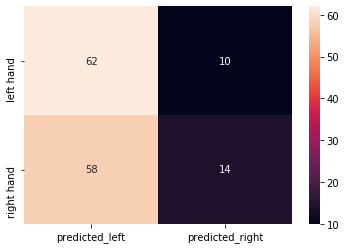

In [1485]:
sns.heatmap(confusion, annot=True)
#2次元配列の図を作成

In [1486]:
print(classification_report(ytest, ypred))
#precisionは適合率でモデルが真と予測した数を分母、実際に正解した数を分子にした値
#recallは再現率で正解データの真の数を分母、モデルが正解した数を分子にした値
#f1-scoreｈはf値でprecisionとrecallの調和平均
#supportは正解データに含まれている個数

              precision    recall  f1-score   support

         0.0       0.58      0.19      0.29        72
         1.0       0.52      0.86      0.65        72

    accuracy                           0.53       144
   macro avg       0.55      0.53      0.47       144
weighted avg       0.55      0.53      0.47       144

